In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [55]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

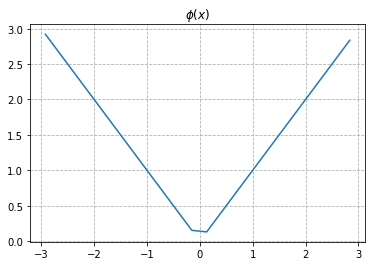

In [56]:
L, R = -3, 3
a, b = -3, 3
N = 50
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [57]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.12920471284886847: 1,
 0.1313392178823065: 1,
 0.13383357630401704: 1,
 0.1519213300416533: 1,
 0.23716188979585429: 1,
 0.2685053052009714: 1,
 0.3303041260611317: 1,
 0.4087799764979909: 1,
 0.4309078837930391: 1,
 0.552225268096957: 1,
 0.5901985486499735: 1,
 0.5924377355893959: 1,
 0.6190961749874413: 1,
 0.6402024747785626: 1,
 0.6732868305355955: 1,
 0.6799911498123734: 1,
 0.7371100247494669: 1,
 0.7910396059126708: 1,
 0.794876079930368: 1,
 0.7949868788809544: 1,
 0.8383831341367389: 1,
 0.9005025522324508: 1,
 1.0000828424884105: 1,
 1.0803147148229184: 1,
 1.2651340774042863: 1,
 1.3131463424677818: 1,
 1.5021018916638047: 1,
 1.531015587795834: 1,
 1.5334895996373765: 1,
 1.5562288948706158: 1,
 1.6881653387720057: 1,
 1.744983988714668: 1,
 1.7454022242103202: 1,
 1.760524568568374: 1,
 1.9015996923288867: 1,
 1.946954399711225: 1,
 2.1069739244899424: 1,
 2.141234567163817: 1,
 2.2316585903961412: 1,
 2.344033861426883: 1,
 2.420013967101787: 1,
 2.437243212085992: 1,

In [58]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

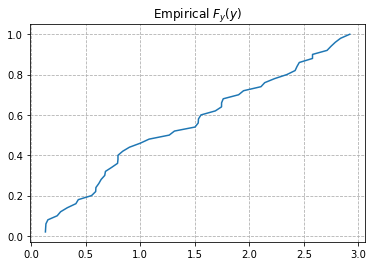

In [59]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]
plt.plot(list(Y.keys()), f_y_emp)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

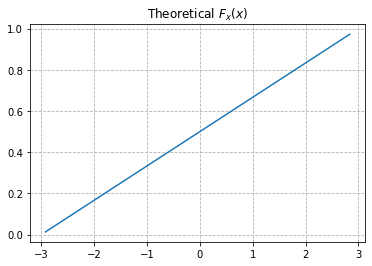

In [60]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - L) / (R - L)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

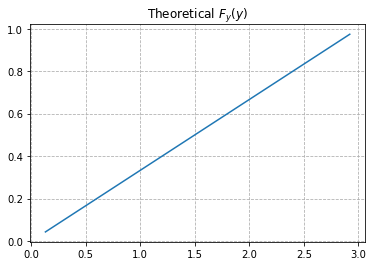

In [61]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

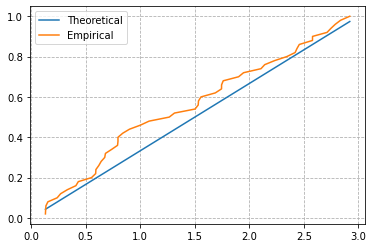

In [62]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(list(Y.keys()), f_y_emp, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

# lab2

<img src="images/assignment2.jpg" width="700">

## Задание 2

### 1. Гистрограмма равноинтервальным методом, полигон расределения и эмпирическая функция распредеделения

In [63]:
X = list(Y.keys())

In [64]:
if N > 100:
    M = int(4 * np.log10(N))
else:
    M = int(np.sqrt(N))

In [65]:
h = (X[-1] - X[0]) / M
A_i = [X[0] + i * h for i in range(M+1)]

In [66]:
a = A_i[:-1]
b = A_i[1:]
intervals = list(zip(a, b))
print("intervals")
intervals

intervals


[(0.12920471284886847, 0.5281206918444985),
 (0.5281206918444985, 0.9270366708401285),
 (0.9270366708401285, 1.3259526498357586),
 (1.3259526498357586, 1.7248686288313886),
 (1.7248686288313886, 2.1237846078270186),
 (2.1237846078270186, 2.5227005868226486),
 (2.5227005868226486, 2.9216165658182787)]

In [67]:
m_i = np.zeros(len(intervals))
current_interval = 0
for value in X:
    if intervals[current_interval][0] < value and value < intervals[current_interval][1]:
        m_i[current_interval] += 1
        continue
    if intervals[current_interval][0] == value or value == intervals[current_interval][1]:
        m_i[current_interval] += 0.5
        continue
    current_interval += 1
m_i[0] += 0.5
m_i[-1] += 0.5
print("m_i")
m_i

m_i


array([ 9., 12.,  3.,  4.,  5.,  5.,  6.])

In [68]:
av_density = [round(value / len(X), 4) / h for value in m_i]
av_density

[0.45122283758398113,
 0.6016304501119748,
 0.1504076125279937,
 0.20054348337065828,
 0.2506793542133229,
 0.2506793542133229,
 0.3008152250559874]

In [69]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(av_density[i])
    interval_x.append(intervals[i][1])
    interval_y.append(av_density[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

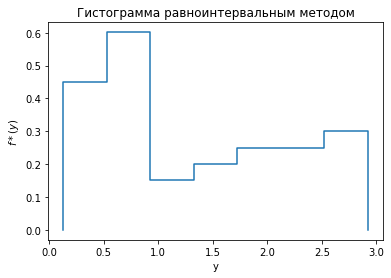

In [70]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

# Lab3

<img src="images/assigment3.jpg" width="700">

## 1. Критерий Пирсона

In [71]:
if N != 200:
    raise ValueError()

ValueError: 

In [ ]:
intervals

In [ ]:
av_density

Перейдем к простому вариационному ряду, выбрав в качестве вариант середины
интервалов

In [ ]:
x_i = [(i[0]+i[1])/2 for i in intervals]
pd.DataFrame(
    {
        'x_i': x_i,
        'n_i': list(map(int, m_i))
    }
)

In [ ]:
average = sum(x_i*m_i) / N
print("Выборочное среднее ", average)

In [ ]:
x_i = np.array(x_i)

In [ ]:
variance = sum((x_i - average)**2 * m_i) / N
print("Выборочная дисперсия ", variance)

In [ ]:
a_, b_ = average - np.sqrt(3*variance), average + np.sqrt(3*variance)

In [ ]:
type(F_x_ther)

In [ ]:
F_x_ther(1)

In [ ]:
n_i_ = np.array([N*(F_y_ther(i[1])-F_y_ther(i[0])) for i in intervals])
print("Теоритические частоты ", n_i_)

In [ ]:
print("{\chi}^2 = ", sum((n_i_ - m_i)**2 / n_i_))

In [ ]:
print(f"число степеней свободы k = s - 1 = {len(intervals) - 1}")

In [ ]:
print(f"при alpha = 0.05 chi^2={15.5}, то есть гипотеза о равномерном распределении принимается")

## 2. Критерий Колмагорова

In [ ]:
if N != 30:
    raise ValueError()

In [ ]:
delta = max(list(map(abs, [f_y_ther[i] - f_y_emp[i] for i in range(len(f_y_emp))])))
print(f"max delta F_emp and F_theor = {delta}")

In [ ]:
lambd = delta*np.sqrt(N)
print(f"lambda = {lambd}")

In [ ]:
print(f"при alpha = 0.01 lambda={1.627}, то есть гипотеза о равномерном распределении принимается")

## 3. Критерий Мизеса

In [72]:
if N != 50:
    raise ValueError()

In [74]:
S = 1/12/N
for i in range(len(X)):
    S += (F_y_ther(X[i]) - (2*i -1)/2/N) ** 2

In [75]:
S

0.10476346924414515

In [79]:
print(f"значение статистики S = {S}")
print("Критическое значение статистики Мизеса на уровне значимости alpha=0.01 по таблице равно=0.74, , то есть гипотеза о равномерном распределении не отвергается")

значение статистики S = 0.10476346924414515
Критическое значение статистики Мизеса на уровне значимости alpha=0.01 по таблице равно=0.74, , то есть гипотеза о равномерном распределении не отвергается
